In [1]:
import re
import numpy as np
import pandas as pd

D:\rgzn\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\rgzn\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
D:\rgzn\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
data = pd.read_excel('21.12.22Twitter(5)(1).xlsx',sheet_name='推文高频词云图关系图')
content = data.content

In [3]:
data1 = pd.read_excel('21.12.22Twitter(5)(1).xlsx',sheet_name='评论高频词云图关系图')
content1 = data1.content

In [4]:
stop_words = []
with open('常用英文停用词(NLP处理英文必备)stopwords.txt','r',encoding='utf-8')as f:
    lines = f.readlines()
    for line in lines:
        stop_words.append(line.strip().replace("'",""))

In [5]:
def preprocess_word(word):
    # Remove punctuation
    word = word.strip('\'"?!,.():;')
    # Convert more than 2 letter repetitions to 2 letter
    # funnnnny --> funny
    word = re.sub(r'(.)\1+', r'\1\1', word)
    # Remove - & '
    word = re.sub(r'(-|\')', '', word)
    return word

In [6]:
def gettext(x):
#     txt = open("piao.txt","r",errors='ignore').read()
#     txt = txt.lower()
    for ch in '!"#$&()*+,-./:;<=>?@[\\]^_{|}·~‘’\n @':
        txt = str(x).replace(ch,"")
    return txt

In [7]:
def handle_emojis(tweet):
    # Smile -- :), : ), :-), (:, ( :, (-:, :')
    tweet = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\))', ' ', tweet)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    tweet = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' ', tweet)
    # Love -- <3, :*
    tweet = re.sub(r'(<3|:\*)', ' ', tweet)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-;
    tweet = re.sub(r'(;-?\)|;-?D|\(-?;)', ' ', tweet)
    # Sad -- :-(, : (, :(, ):, )-:
    tweet = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:)', ' ', tweet)
    # Cry -- :,(, :'(, :"(
    tweet = re.sub(r'(:,\(|:\'\(|:"\()', ' ', tweet)
    tweet = re.sub(r'#GTCartoon:', ' ', tweet)
    return tweet

In [8]:
##判断是否为无效word
def is_valid_word(word):
    # Check if word begins with an alphabet
    return (re.search(r'^[a-zA-Z][a-z0-9A-Z\._]*$', word) is not None)

In [9]:
def clean_text(tweet):
    processed_tweet = []
    # Convert to lower case
    tweet = tweet.lower()
    # Replaces URLs with the word URL
    tweet = re.sub(r'((www\.[\S]+)|(https?://[\S]+))', ' ', tweet)
    # Replace @handle with the word USER_MENTION
    tweet = re.sub(r'@[\S]+', 'USER_MENTION', tweet)
    # Replaces #hashtag with hashtag
    tweet = re.sub(r'#(\S+)', ' ', tweet)
    # Remove RT (retweet)
    tweet = re.sub(r'\brt\b', ' ', tweet)
    # Replace 2+ dots with space
    tweet = re.sub(r'\.{2,}', ' ', tweet)
    # Strip space, " and ' from tweet
    tweet = tweet.strip(' "\'')
    # Replace emojis with either EMO_POS or EMO_NEG
    tweet = handle_emojis(tweet)
    # Replace multiple spaces with a single space
    tweet = re.sub(r'\s+', ' ', tweet)
    processed_tweet.append(tweet)
#     words = tweet.lower().split()
#     words = [w for w in words if w not in stop_words]
#     for word in words:
#         word = preprocess_word(word)
#         if is_valid_word(word):
#             processed_tweet.append(word)
    return processed_tweet

In [10]:
content = content.apply(gettext)
content = content.apply(preprocess_word)
content = content.apply(handle_emojis)
content = content.apply(clean_text)

In [11]:
content1 = content1.apply(gettext)
content1 = content1.apply(preprocess_word)
content1 = content1.apply(handle_emojis)
content1 = content1.apply(clean_text)

In [12]:
import nltk

In [13]:
sum_cotent = []
for c in content:
    tokens = nltk.word_tokenize(c[0])
    tagged = nltk.pos_tag(tokens)
    for t in tagged:
        if t[1] == "JJ" or t[1] == "NN" or t[1] == "RB":
            sum_cotent.append(t[0])

In [14]:
words = [w for w in sum_cotent if w not in stop_words]
processed_tweet = []
for word in words:
    if is_valid_word(word):
        processed_tweet.append(word)

In [15]:
sum_content = []
for c in processed_tweet:
    if len(c) >=1:
        sum_content.append(c)

In [17]:
counts = {}
for s in sum_content:
    counts[s] = counts.get(s,0) + 1


In [18]:
items = list(counts.items())
items.sort(key=lambda x:x[1],reverse=True)
list_word = []
list_count = []
for i in items:
    word,count = i
    list_word.append(word)
    list_count.append(count)
data = pd.DataFrame()
data['word'] = list_word
data['count'] = list_count
data.to_csv('推文高频词.csv')
# items.remove(('liurui60688', 39))
# items

In [26]:
import pyecharts.options as opts
from pyecharts.charts import WordCloud
from pyecharts.globals import ThemeType
w = (
    WordCloud(init_opts=opts.InitOpts(theme=ThemeType.LIGHT,width="600px",height="400px"))
    .add(series_name="推文高频词云图", data_pair=items[0:100],word_size_range=[15, 66])
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="推文高频词云图", title_textstyle_opts=opts.TextStyleOpts(font_size=23)
        ),
        tooltip_opts=opts.TooltipOpts(is_show=True),
    )
)
w.render_notebook()

In [48]:
import codecs
import networkx as nx
import matplotlib.pyplot as plt
import csv
from scipy.sparse import coo_matrix

In [49]:
sum_cotent = []
sum_cotent1 = []
for c in content:
    tokens = nltk.word_tokenize(c[0])
    tagged = nltk.pos_tag(tokens)
    for t in tagged:
        if t[1] == "JJ" or t[1] == "NN" or t[1] == "RB":
            if t[0] != "liurui60688":
                sum_cotent.append(t[0])
    sum_cotent1.append(sum_cotent)
    sum_cotent = []


In [50]:
from tqdm import tqdm
word_vector = coo_matrix((len(sum_cotent1), len(sum_cotent1)), dtype=np.int8).toarray()
with open('推文高频词.txt','w', encoding='utf-8')as f:
    for line in tqdm(sum_cotent1):
        if len(line) != 0:
            a = ' '.join(line)
            f.write(a+"\n")

100%|██████████| 143/143 [00:00<00:00, 151346.32it/s]


In [51]:
word = [] #记录关键词
f = open("推文高频词.txt", encoding='utf-8')            
line = f.readline()           
while line:
    #print line
    line = line.replace("\n", "") #过滤换行
    line = line.strip('\n') 
    for n in line.split(' '):
        #print n
        if n not in word:
            word.append(n)
    line = f.readline()
f.close()
print(len(word)) #关键词总数

414


In [52]:
word_vector = coo_matrix((len(word),len(word)), dtype=np.int8).toarray() 
print(word_vector.shape)

(414, 414)


In [53]:
f = open("推文高频词.txt", encoding='utf-8')  
line = f.readline()           
while line:
    line = line.replace("\n", "") #过滤换行
    line = line.strip('\n') #过滤换行
    nums = line.split(' ')
    #循环遍历关键词所在位置 设置word_vector计数
    i = 0
    j = 0
    while i<len(nums):         #ABCD共现 AB AC AD BC BD CD加1
        j = i + 1
        w1 = nums[i]           #第一个单词
        while j<len(nums):
            w2 = nums[j]       #第二个单词
            #从word数组中找到单词对应的下标
            k = 0
            n1 = 0
            while k<len(word):
                if w1==word[k]:
                    n1 = k
                    break
                k = k +1
            #寻找第二个关键字位置
            k = 0
            n2 = 0
            while k<len(word):
                if w2==word[k]:
                    n2 = k
                    break
                k = k +1
            
            #重点: 词频矩阵赋值 只计算上三角
            if n1<=n2:
                word_vector[n1][n2] = word_vector[n1][n2] + 1
            else:
                word_vector[n2][n1] = word_vector[n2][n1] + 1
            j = j + 1
        i = i + 1
    #读取新内容
    line = f.readline()
f.close()

In [57]:
words = codecs.open("word_node.txt", "a+", "utf-8")
i = 0
while i<len(word[0:100]):
    student1 = word[0:100][i]
    j = i + 1
    while j<len(word[0:100]):
        student2 = word[0:100][j]
        if word_vector[i][j]>0:
            words.write(student1 + " " + student2 + " " 
                + str(word_vector[i][j]) + "\r\n")
        j = j + 1
    i = i + 1
words.close()

In [58]:
""" 第四步:图形生成 """
a = []
f = codecs.open('word_node.txt','r','utf-8')
line = f.readline()
i = 0
A = []
B = []
while line!="":
    a.append(line.split())   #保存文件是以空格分离的
    A.append(a[i][0])
    B.append(a[i][1])
    i = i + 1
    line = f.readline()
elem_dic = tuple(zip(A,B))
f.close()

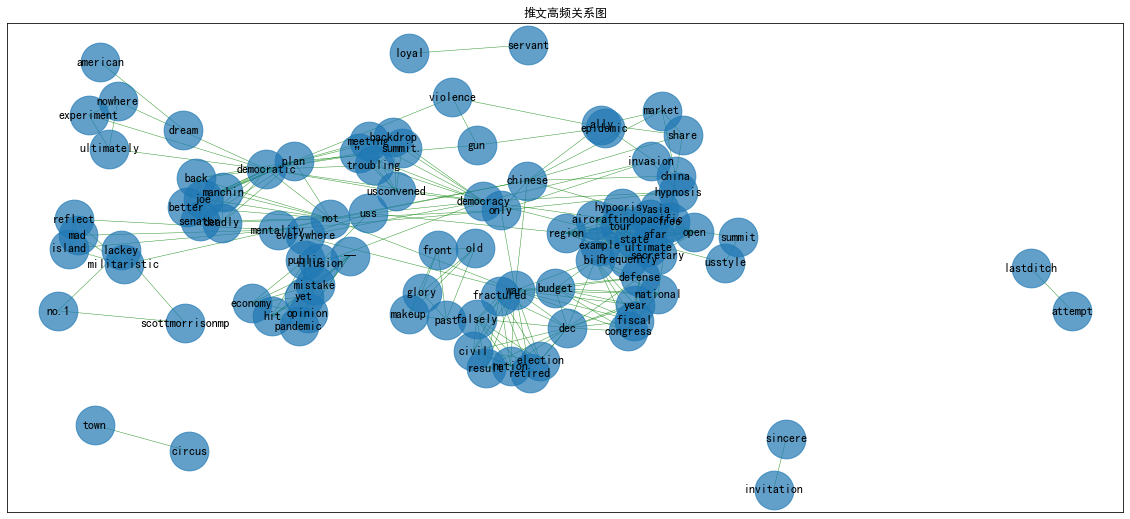

In [60]:
import matplotlib
colors = ["red","green","blue","yellow"]
G = nx.Graph()
G.add_edges_from(list(elem_dic))
matplotlib.rcParams['font.sans-serif'] = ['SimHei']   
matplotlib.rcParams['font.family']='sans-serif'
plt.figure(figsize=(20, 9))
pos=nx.spring_layout(G,iterations=10)
nx.draw_networkx_nodes(G, pos, alpha=0.7,node_size=1500)
nx.draw_networkx_edges(G,pos,width=0.5,alpha=0.8,edge_color='g')
nx.draw_networkx_labels(G, pos, font_family='sans-serif', alpha=1)
plt.title("推文高频关系图")
plt.savefig('推文高频关系图.jpg')
plt.show()